# Homework 3, Exercise 2
*Julia Herzen, Klaus Achterhold, Clemens Schmid, Manuel Schultheiss*

November 22, 2020
## Spline Order

The goal of this exercise is to look at the results of different orders of spline interpolation. 

For simplicity, we will use the `scipy.ndimage.rotate` function to rotate an image.
The function uses a special case of affine transform, where the re-gridding and interpolation steps are performed automatically. It accepts the `order` parameter, which may take integers between 0 and 5. These correspond to different interpolation methods.

You need to replace the `??` in the code with the required commands.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as nd

from ipywidgets import interact
import ipywidgets as widgets

* Load the 'baboon.png' image,
* Average all color channels,
* normalize the maximum value to 1:

In [3]:
img = plt.imread('baboon.png').mean(-1)
img = img/img.max()
sh = np.shape(img)

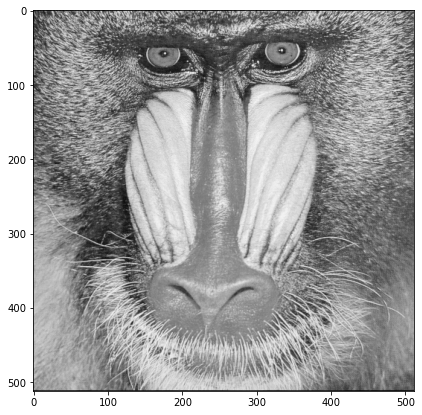

In [4]:
plt.figure(1, figsize=(7,7))
plt.imshow(img, cmap='gray')

Crop the image to e.g. $200 \times 200$ pixels while **focusing on fine structures**!

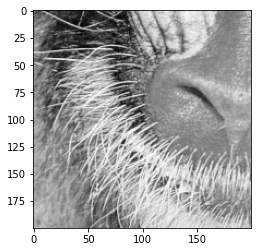

In [5]:
img_cropped = img[300:500, 50:250]
plt.figure(2)
plt.imshow(img_cropped, cmap='gray')

We will look at:
* Nearest-neighbor interpolation (`order = 0`)
* Bilinear interpolation (`order = 1`)
* Biquadratic interpolation (`order = 2`)
* Bicubic interpolation (`order = 3`)
* Order-5 ("biquintic"?) interpolation (`order = 5`)

For each method, we will save the interpolated images (one for each angle) in a list:

In [6]:
img_order0 = []
img_order1 = []
img_order2 = []
img_order3 = []
img_order5 = []

Define an equidistant range of angles between 0 and 360 degrees. Do not repeat the 0-th angle at the end ($0^{\circ} = 360^{\circ}$).

Please choose a multiple of 4 for the number of angles.

In [7]:
Nsteps = 20

angles = np.linspace(0, 360, Nsteps, endpoint=False)
angles

array([  0.,  18.,  36.,  54.,  72.,  90., 108., 126., 144., 162., 180.,
       198., 216., 234., 252., 270., 288., 306., 324., 342.])

Now, apply the rotation for each angle and each interpolation order.
Ensure that the **shape of the image is not changed** (remember exercise 1)!

In [8]:
for angle in angles:
    img_order0.append(nd.rotate(img_cropped, angle, reshape=False, order=0))
    img_order1.append(nd.rotate(img_cropped, angle, reshape=False, order=1))
    img_order2.append(nd.rotate(img_cropped, angle, reshape=False, order=2))
    img_order3.append(nd.rotate(img_cropped, angle, reshape=False, order=3))
    img_order5.append(nd.rotate(img_cropped, angle, reshape=False, order=5))
    
    # ... and so on for all five lists.

Define a function which takes the parameter `step` and plots the `step`-th image of all five interpolation methods in a $2 \times 3$ grid (you'll have to leave one grid element empty of course):

In [9]:
def show_all_orders(step):
    plt.figure(3, figsize=(30,15))
    plt.subplot(2,3,1); plt.title('Nearest-neighbor interpolation')
    plt.imshow(img_order0[step], cmap='gray')
    plt.subplot(2,3,2); plt.title('Bilinear interpolation')
    plt.imshow(img_order1[step], cmap='gray')
    plt.subplot(2,3,3); plt.title('Biquadratic interpolation')
    plt.imshow(img_order2[step], cmap='gray')
    plt.subplot(2,3,4); plt.title('Bicubic interpolation')
    plt.imshow(img_order3[step], cmap='gray')
    plt.subplot(2,3,5); plt.title('Biquintic interpolation')
    plt.imshow(img_order5[step], cmap='gray')
    plt.show()
   
    # ... and so on for all five variants.

In IPython Notebook, we can use a slider to go manually go through the images:

(while the slider is highlighted, you can also use the arrow keys)

In [10]:
interact(show_all_orders, step=widgets.IntSlider(min=0,max=Nsteps,step=1,value=0));

interactive(children=(IntSlider(value=0, description='step', max=20), Output()), _dom_classes=('widget-interac…

**Questions to consider:**

* Which features are noticeably different in the different methods? Why?
    * **High frequency features** are the most distinguishable. As we increase the order of interpolation, the loss of details decreases. Since features are in the order of couple of pixels, same as interpolation. 
* For some special angles, all methods produce the same result. Why?
    * **Output coordinates are the same as the input, meaning that there is no need to interpolate, it's just sampling**

**BONUS TASK:** To focus on the differences between the methods, repeat the above with a new function, showing the difference with respect to the next smaller order (i.e. order 1 minus order 0, order 2 minus order 1, etc.). This means of course that a 2x2 grid is sufficient.

Optionally, to allow comparing the magnitude of the differences, fix the scale of imshow with the keywords `vmin`, `vmax`.

In [11]:
def show_differences(step):
    
    plt.figure(4, figsize=(10,10))
    plt.subplot(2,2,1); plt.title('order 1 - order 0')
    plt.imshow(img_order1[step] - img_order0[step], cmap='gray')
    plt.subplot(2,2,2); plt.title('order 2 - order 1')
    plt.imshow(img_order2[step] - img_order1[step], cmap='gray')
    plt.subplot(2,2,3); plt.title('order 3 - order 2')
    plt.imshow(img_order3[step] - img_order2[step], cmap='gray')
    plt.subplot(2,2,4); plt.title('order 5 - order 3')
    plt.imshow(img_order5[step] - img_order3[step], cmap='gray')
    # ... and so on for all four differences.

In [12]:
plt.imshow?


In [13]:
interact(show_differences, step=widgets.IntSlider(min=0,max=20,step=1,value=0));

interactive(children=(IntSlider(value=0, description='step', max=20), Output()), _dom_classes=('widget-interac…

Optionally, modify `show_differences` such that the scale of all images is fixed to the range $[-0.3, 0.3]$ (consider the `vmin`, `vmax` keywords.

What differences do you notice?

In [14]:
def show_differences2(step):
    plt.figure(5, figsize=(10,10))
    plt.subplot(2,2,1); plt.title('order 1 - order 0')
    plt.imshow(img_order1[step] - img_order0[step], cmap='gray', vmin = -0.3, vmax = 0.3)
    plt.subplot(2,2,2); plt.title('order 2 - order 1')
    plt.imshow(img_order2[step] - img_order1[step], cmap='gray', vmin = -0.3, vmax = 0.3)
    plt.subplot(2,2,3); plt.title('order 3 - order 2')
    plt.imshow(img_order3[step] - img_order2[step], cmap='gray', vmin = -0.3, vmax = 0.3)
    plt.subplot(2,2,4); plt.title('order 5 - order 3')
    plt.imshow(img_order5[step] - img_order3[step], cmap='gray', vmin = -0.3, vmax = 0.3)

In [15]:
interact(show_differences2, step=widgets.IntSlider(min=0,max=20,step=1,value=0));

interactive(children=(IntSlider(value=0, description='step', max=20), Output()), _dom_classes=('widget-interac…

Differences increase in frequency. Frequency increases with polynomial order. Differences keep decreasing as the order arises. 